# Proyek Machine Learning 2: [Song Rating Dataset]
- **Nama:** [Andreas Kevin]
- **Email:** [Kevinandreas913@gmail.com]
- **ID Dicoding:** [andreas_kevin_6396]

## Menentukan Problem Statement

- Bagaimana sistem dapat memberikan rekomendasi lagu yang relevan berdasarkan kemiripan konten (judul lagu) dan kemiripan konten tersebut tercermin dalam skor evaluasi?
- Bagaimana sistem memberikan rekomendasi lagu secara personal kepada pengguna berdasarkan favorite artis sebelumnya, dan seberapa akurat model tersebut dalam memprediksi skor/penilaian terhadap lagu yang belum pernah didengarkan?  

## Import Semua Packages/Library yang Digunakan

In [38]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn.metrics as met 

from sklearn.metrics import mean_squared_error

import re

## Data Understanding

### Data Gathering & Data Understanding

- Dataset diperoleh dari: https://www.kaggle.com/datasets/deependraverma13/all-songs-rating-review
- Dataset didownload dalam format .csv file 

In [39]:
df_songs = pd.read_csv("song.csv", sep=",")
display(df_songs)

,Unnamed: 0,Name of the Song,Artist,Date of Release,Description,Metascore,User Score
0,0,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
1,1,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
2,2,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN
3,3,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
4,4,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN
...,...,...,...,...,...,...,...
198121,198121,The Soft Bulletin,by The Flaming Lips,"June 22, 1999",The Dave Fridmann-produced 'Soft Bulletin' is ...,85.0,8.7
198122,198122,13,by Blur,"March 23, 1999",Damon Albarn's breakup album (he split with hi...,79.0,8.7
198123,198123,Black Foliage: Animation Music,by The Olivia Tremor Control,"March 23, 1999",This second studio album for the experimental ...,75.0,8.6
198124,198124,Central Reservation,by Beth Orton,"March 9, 1999",This is the second album for the English singe...,84.0,8.9


**Insight:**
- Proses pengumpulan data berdasarkan data "All Songs Rating Review".
- Data terdiri dari 7 atribut kolom dan 198126 data.
- Dalam menjawab pertanyaan bisnis yang disampaikan, pengumpulan data akan berfokus pada data "song.csv".
- Data dalam bentuk csv sehingga pemanggilan data dan visualisasi tabel diperlukan library pandas.

**Rincian atribut dataset:**
- Name of the song = Berisikan nama lagu-lagu.
- Artist = Berisikan nama artis dari lagu tersebut.
- Date of Release = Tanggal dirilis lagu tersebut.
- Description = Rincian deskripsi mengenai lagu.
- Metascore = Nilai rata-rata berdasarkan kritikus.
- User Score = Nilai score dari pengguna mengenai lagu tersebut.

In [40]:
df_songs.info()

print(f"""
jumlah data kosong: 
{df_songs.isnull().sum()}""")  
print("Jumlah duplikasi: ", df_songs.duplicated().sum())  
print("Jumlah duplikasi berdasarkan judul lagu:", df_songs.duplicated(subset=['Name of the Song']).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198126 entries, 0 to 198125
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        198126 non-null  int64  
 1   Name of the Song  198126 non-null  object 
 2   Artist            198126 non-null  object 
 3   Date of Release   198126 non-null  object 
 4   Description       193757 non-null  object 
 5   Metascore         173741 non-null  float64
 6   User Score        148845 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.6+ MB

jumlah data kosong: 
Unnamed: 0              0
Name of the Song        0
Artist                  0
Date of Release         0
Description          4369
Metascore           24385
User Score          49281
dtype: int64
Jumlah duplikasi:  0
Jumlah duplikasi berdasarkan judul lagu: 194214


**Insight:**
- **.info()** untuk meliht informasi atas dataset terserbut berupa jenis tipe data hingga jumlah data.
- **isnull().sum()** digunakan untuk menilai jumlah data yang kosong pada data. 
- **.duplicated().sum()** untuk menilai jumlah duplikasi pada data. Pada bagian ini terlihat jumlah duplikasi pada data adalah 0.
- **.duplicated(subset=['Name of the Song']).sum()** untuk melihat jumlah duplikasi data pada atribut Name of the Song. Pada ini terdapat data lagu yang duplicate.
  
- Data total terdiri dari 198126 Data.
- Terdapat data kosong pada Description berjumlah 4369 data, Metascore berjumlah 24385 data, dan User Score berjumlah 49281 data.
- Jumlah duplikasi berdapatkan judul lagu terdapat 194214 lagu.

Histogram untuk Unnamed: 0:


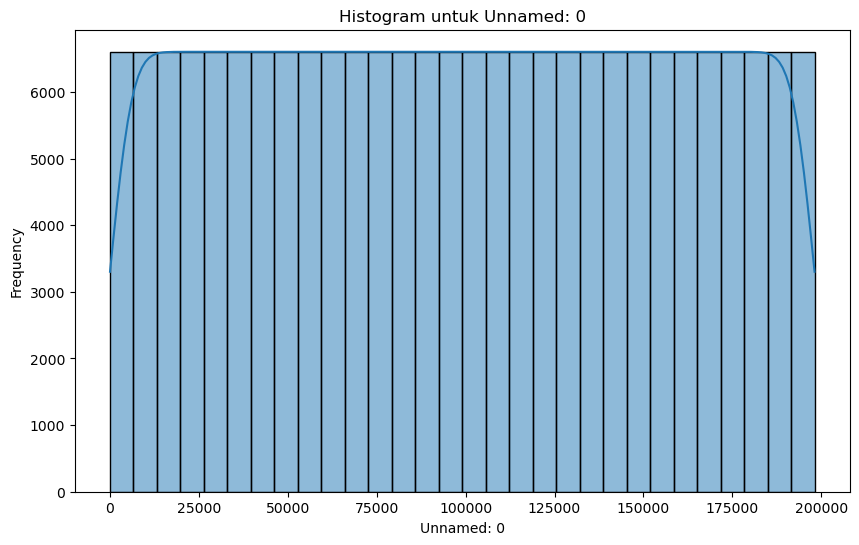

Histogram untuk Metascore:


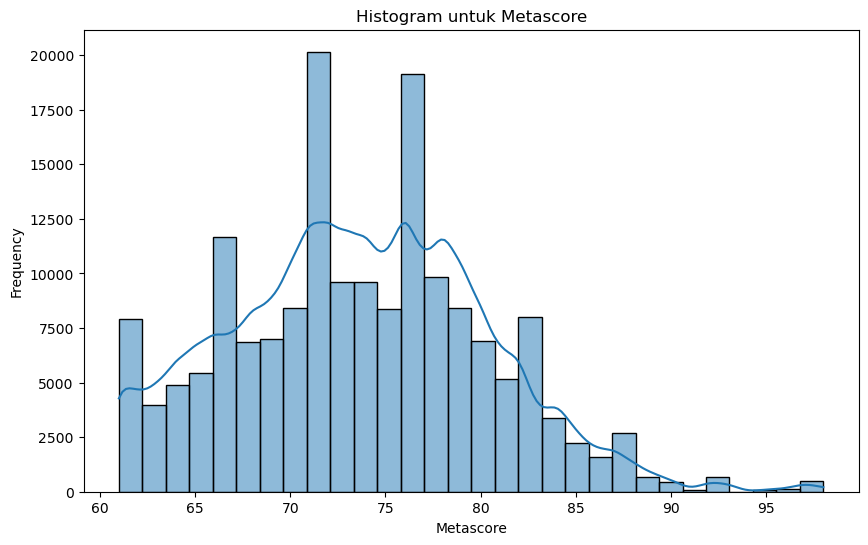

Histogram untuk User Score:


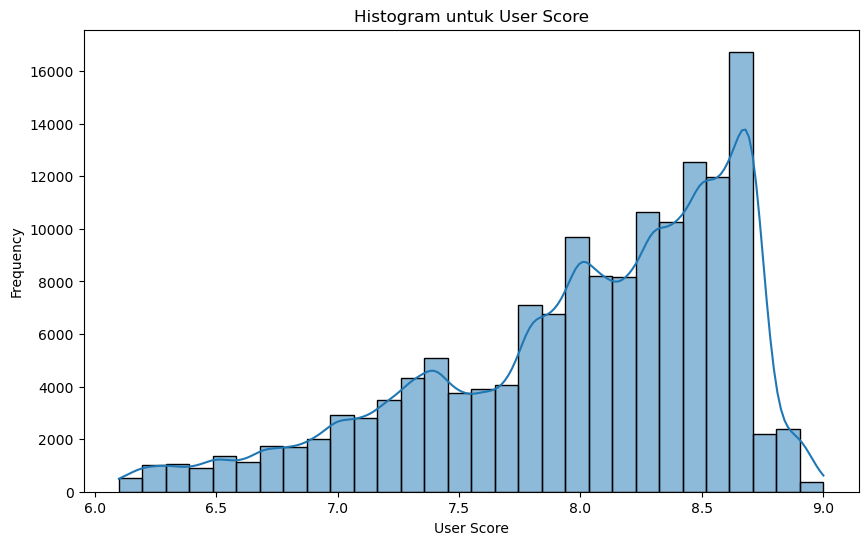

In [42]:
def histogram(name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_songs[name], bins=30, kde=True)
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram untuk {name}")
    plt.show()

for col in df_songs.select_dtypes(include=[np.number]).columns:
    print(f"Histogram untuk {col}:")
    histogram(col)

**Insight:**
- Visualisasi histogram bertujuan untuk melihat pernyebaran data saat ini.

## Data Preparation General for Content Base Filtering and Collaborative Filtering

In [4]:
df_songs = df_songs.dropna()
df_songs = df_songs.drop_duplicates(subset=['Name of the Song'])

**Insight:**
- **.dropna()** untuk membuang baris yang kosong.
- **.drop_duplicates(subset=["Name of the Song"])** untuk membuang data yang kosong tersebut.

In [5]:
df_songs.isnull().sum()
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2537 entries, 0 to 198125
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2537 non-null   int64  
 1   Name of the Song  2537 non-null   object 
 2   Artist            2537 non-null   object 
 3   Date of Release   2537 non-null   object 
 4   Description       2537 non-null   object 
 5   Metascore         2537 non-null   float64
 6   User Score        2537 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 158.6+ KB


**Insight:**
- Total data setelah dibersihkan terdiri dari 2537 data dengan 7 atribut.

In [6]:
df_songs_encode = df_songs.copy()
df_songs_encode['Artist'] = df_songs['Artist'].str.replace(r'^by\s+', '', regex=True)
display(df_songs_encode)

,Unnamed: 0,Name of the Song,Artist,Date of Release,Description,Metascore,User Score
0,0,Electric Ladyland [50th Anniversary Deluxe Edi...,The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
5,5,Saint Cecilia EP,Foo Fighters,"November 23, 2015",The five-track free EP from the rock band was ...,76.0,8.2
9,9,Allas Sak,Dungen,"September 25, 2015",The seventh release for the Swedish band led b...,81.0,7.2
14,14,Dry Food,Palehound,"August 14, 2015",This is the debut full-length release for Bost...,78.0,8.6
20,20,Coda [Remastered],Led Zeppelin,"July 31, 2015",The death of John Bonham in 1980 led to the br...,78.0,7.9
...,...,...,...,...,...,...,...
197939,197939,The Soft Bulletin,The Flaming Lips,"June 22, 1999",The Dave Fridmann-produced 'Soft Bulletin' is ...,85.0,8.7
197984,197984,13,Blur,"March 23, 1999",Damon Albarn's breakup album (he split with hi...,79.0,8.7
198030,198030,Black Foliage: Animation Music,The Olivia Tremor Control,"March 23, 1999",This second studio album for the experimental ...,75.0,8.6
198077,198077,Central Reservation,Beth Orton,"March 9, 1999",This is the second album for the English singe...,84.0,8.9


**Insight:**
- Pada dataframe tersebut terlihat data pada atribut **Artist** dengan setiap nama artis dimulai dengan awal "by". Maka akan dilakukan proses untuk membuang kata by di setiap awal nama artis tersebut.

## Data Prepration Content Base Filtering

In [8]:
df_songs = df_songs_encode.copy()
df_songs= df_songs.drop(['Description', 'Unnamed: 0', 'Date of Release'], axis = 1)
display(df_songs)

,Name of the Song,Artist,Metascore,User Score
0,Electric Ladyland [50th Anniversary Deluxe Edi...,The Jimi Hendrix Experience,97.0,8.9
5,Saint Cecilia EP,Foo Fighters,76.0,8.2
9,Allas Sak,Dungen,81.0,7.2
14,Dry Food,Palehound,78.0,8.6
20,Coda [Remastered],Led Zeppelin,78.0,7.9
...,...,...,...,...
197939,The Soft Bulletin,The Flaming Lips,85.0,8.7
197984,13,Blur,79.0,8.7
198030,Black Foliage: Animation Music,The Olivia Tremor Control,75.0,8.6
198077,Central Reservation,Beth Orton,84.0,8.9


In [9]:
len(df_songs['Name of the Song'].unique())

2537

In [10]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2537 entries, 0 to 198125
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of the Song  2537 non-null   object 
 1   Artist            2537 non-null   object 
 2   Metascore         2537 non-null   float64
 3   User Score        2537 non-null   float64
dtypes: float64(2), object(2)
memory usage: 99.1+ KB


**Insight:**
- Proses Data preparation untuk Content Base Filetering dilakukan dengan membuang atribut **Description, Unnamed: 0, dan Date of Release**. Tujuan dari pembuangan atribut ini untuk mempersiapkan atribut yang akan digunakan pada proses CBF.
- Jumlah total data yang digunakan pada proses ini adalah 2537 data dengan atribut yang digunakan berupa nama lagu, artis, metascore, dn user score.

In [11]:
tf = TfidfVectorizer()

tfidf_matrix = tf.fit_transform(df_songs['Name of the Song']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(2537, 3056)

In [12]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

**Insight:**
- **TfidfVectorizer()** digunakan untuk mengubah teks menjadi representasi numerik berbasis TF-IDF (Term Frequency-Inverse Document Frequency), yang mencerminkan seberapa penting suatu kata dalam dokumen.
- **fit_transform(df_songs['Name of the Song'])** melakukan proses pelatihan dan transformasi langsung terhadap data lagu menjadi matriks TF-IDF.
- **tfidf_matrix.shape** digunakan untuk melihat ukuran matriks TF-IDF, menunjukkan jumlah lagu (baris) dan jumlah fitur unik (kolom) dari judul lagu.
- **tfidf_matrix.todense()** digunakan untuk mengubah matriks sparse menjadi bentuk dense agar lebih mudah dibaca dan dianalisis secara langsung.

In [13]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=df_songs['Artist']
).sample(10, axis=1).sample(10, axis=0)

,celebration,realize,loss,ferdinand,underworld,total,hates,market,water,worth
Artist,,,,,,,,,,
Buckcherry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Little Barrie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tom Petty & the Heartbreakers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arab Strap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pet Shop Boys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
David Holmes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dirty Three,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Mars Volta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jason Collett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Insight:**
- Proses ini dilkaukan untuk menyesuaikan dataframe dengan menjadikan Artist sebagai index.

## Model Development Content Base Filtering

In [14]:
 # Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Insight:**
- Proses cosine_similarity digunakan untuk menhitung similarity dari matriks yang telah dibuat.

In [15]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama lagu
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_songs['Name of the Song'], columns=df_songs['Name of the Song'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(10, axis=0).sample(10, axis=0)

Shape: (2537, 2537)


Name of the Song,Electric Ladyland [50th Anniversary Deluxe Edition],Saint Cecilia EP,Allas Sak,Dry Food,Coda [Remastered],In Through the Out Door [Remastered],Presence [Remastered],Amused to Death [Reissue],Houses of the Holy [Remastered],(What's the Story) Morning Glory? [Deluxe Edition - Remastered],...,Disco and The Half Way To Discontent,Midnite Vultures,When The Pawn...,69 Love Songs,One Part Lullaby,The Soft Bulletin,13,Black Foliage: Animation Music,Central Reservation,Keep It Like A Secret
Name of the Song,,,,,,,,,,,,,,,,,,,,,
In Love And Death,0.0,0.0,0.0,0.0,0.0,0.123863,0.0,0.314553,0.000000,0.000000,...,0.116897,0.0,0.000000,0.215038,0.0,0.000000,0.0,0.0,0.0,0.0
Reunion Tour,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
Stars Of CCTV,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.085380,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
The Grey Album,0.0,0.0,0.0,0.0,0.0,0.043436,0.0,0.000000,0.046450,0.033659,...,0.037637,0.0,0.058723,0.000000,0.0,0.054836,0.0,0.0,0.0,0.0
Vessels,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
Gods Of The Earth,0.0,0.0,0.0,0.0,0.0,0.040258,0.0,0.000000,0.129987,0.031197,...,0.034884,0.0,0.054427,0.000000,0.0,0.050824,0.0,0.0,0.0,0.0
In Space,0.0,0.0,0.0,0.0,0.0,0.151059,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
"The Good, The Bad & The Queen",0.0,0.0,0.0,0.0,0.0,0.091682,0.0,0.000000,0.098043,0.071045,...,0.079442,0.0,0.123950,0.000000,0.0,0.115744,0.0,0.0,0.0,0.0
My Maudlin Career,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [16]:
def song_recomendations(target_song_artist, similarity_data=cosine_sim_df, items=df_songs[['Name of the Song', 'Artist']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,target_song_artist].to_numpy().argpartition(
        range(-1, -k, -1)).flatten()
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop target_song_artist agar nama artis yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(target_song_artist, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

**Insight:**
- **def song_recommendations(...)** digunakan sebagai fungsi rekomendasi lagu berdasarkan kemiripan (similarity) antar lagu dan artis.
- **similarity_data.loc[:, target_song_artist].to_numpy().argpartition(...)** digunakan untuk mencari index dari lagu yang paling mirip (nilai similarity tertinggi) terhadap lagu/artis target, tanpa mengurutkan seluruh data (lebih efisien).
- **closest = similarity_data.columns[index[-1:-(k+2):-1]]** mengambil k+1 lagu teratas dari hasil similarity tertinggi (termasuk lagu target).
- **closest.drop(target_song_artist, errors='ignore')** memastikan lagu/artis yang sama tidak direkomendasikan.
- **pd.DataFrame(closest).merge(items)** menggabungkan hasil rekomendasi dengan informasi lagu dan artis dari data asli.

## Solusi - Top 5 rekomendasi pada teknik Content Base Filtering

In [17]:
song_recomendations('Keep It Like A Secret')

,Name of the Song,Artist
0,Keep It Together,Guster
1,Keep It Simple,Van Morrison
2,Keep It Hid,Dan Auerbach
3,It's Never Been Like That,Phoenix
4,Become Secret,Picastro


In [18]:
song_recomendations('The Midnight Organ Fight')

,Name of the Song,Artist
0,The Ugly Organ,Cursive
1,Fight Softly,The Ruby Suns
2,Midnight Movies,Midnight Movies
3,Snowflake Midnight,Mercury Rev
4,"The Pariah, The Parrot, The Delusion",Dredg


In [19]:
song_recomendations('Hard Candy')

,Name of the Song,Artist
0,Low Kick And Hard Bop,Solex
1,Church Gone Wild / Chirpin Hard,Hella
2,Kensington Heights,The Constantines
3,The Midnight Organ Fight,Frightened Rabbit
4,Third,Portishead


**Insight:**
- Ketiga proses tersebut merupakan contoh penggunakan fungsi dari **song_recomendations** yang telah dibuat sebelumnya dalam memberikan 3 lagu terbaik.

## Evaluation Content Base Filtering

In [20]:
def tokenisasi(teks):
    # Token(tanpa tanda baca, huruf kecil semua)
    return set(re.findall(r'\b\w+\b', teks.lower()))

def presisi_untuk_lagu_acak(data_lagu, matriks_similarity, k=3):
    # Pilih satu lagu acak dari dataset menggunakan sample
    lagu_target = data_lagu['Name of the Song'].sample(n=1).values[0]
    print(f"Lagu target yang dipilih secara acak: {lagu_target}")

    # Pastikan lagu target ada dalam matriks kemiripan
    if lagu_target not in matriks_similarity.columns:
        print(f"Lagu {lagu_target} tidak ditemukan dalam matriks kemiripan.")
        return

    # Ambil 3 rekomendasi lagu terdekat
    try:
        rekomendasi = song_recomendations(lagu_target, similarity_data=matriks_similarity, k=k)
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        return

    # Token dari judul lagu target
    token_target = tokenisasi(lagu_target)
    if not token_target:
        print(f"Tidak ada token untuk lagu target: {lagu_target}")
        return

    jumlah_relevan = 0
    for judul_lagu_rekom in rekomendasi['Name of the Song']:
        token_rekom = tokenisasi(judul_lagu_rekom)
        # Jika ada minimal satu kata yang sama, dianggap relevan
        if token_target & token_rekom:
            jumlah_relevan += 1

    # Hitung presisi untuk lagu ini
    presisi = jumlah_relevan / k
    print(f"Presisi untuk lagu target {lagu_target}: {presisi:.2f}")

    # Simpan contoh hasil rekomendasi ke dalam DataFrame
    hasil_df = rekomendasi.copy()
    hasil_df.insert(0, "Judul Lagu Target", lagu_target)
    # hasil_df["Presisi Lagu Ini"] = f"{presisi:.2f}"

    # Tampilkan hasil rekomendasi dan presisi
    print("\n Hasil rekomendasi dan presisi:")
    display(hasil_df)

    return presisi, hasil_df

In [21]:
presisi, hasil_rekom = presisi_untuk_lagu_acak(df_songs, cosine_sim_df, k=5)

Lagu target yang dipilih secara acak: I Feel Cream
Presisi untuk lagu target I Feel Cream: 0.80

 Hasil rekomendasi dan presisi:


,Judul Lagu Target,Name of the Song,Artist
0,I Feel Cream,Cream Cuts,Tussle
1,I Feel Cream,Ice Cream Spiritual,Ponytail
2,I Feel Cream,Feel.Love.Thinking.Of.,Faunts
3,I Feel Cream,Come Feel Me Tremble,Paul Westerberg
4,I Feel Cream,Fair Ain't Fair,Tim Fite


**Insight:**  
Presisi digunakan untuk mengukur seberapa relevan rekomendasi yang diberikan terhadap lagu target berdasarkan kemiripan kata dalam judul.
Pada kasus tersebut menggunakan presisi untuk mengukur judul yang dihasilkan yang memiliki kata tersebut.  

Contohnya:  
- Ketika mencari lagu dengan judul "I Fell Cream" maka akan memunculkan lagu Cream Cuts, Ice Cream Spriritual, Fell.Love.Thinking.Of., Come Feel Me Tremble, dan Fair Ain't Fait.
- Hasil tersebut fokus untuk mencari 5 lagu yang mengandung kata di dalamnya "I", "Fell", dan "Cream".
- Memuncullkan "Cream" pada "Cream Cuts" dan "Ice Cream Spiritual, "I" pada "Fell.Love.Thinking.Of.", dan "Fell" pada "Come Feel Me Tremble".
- maka 4 data yang benar sehingga 4/5 = 0,8 atau 80%. 

## Data Preparation Collaborative Filtering

In [22]:
display(df_songs)

,Name of the Song,Artist,Metascore,User Score
0,Electric Ladyland [50th Anniversary Deluxe Edi...,The Jimi Hendrix Experience,97.0,8.9
5,Saint Cecilia EP,Foo Fighters,76.0,8.2
9,Allas Sak,Dungen,81.0,7.2
14,Dry Food,Palehound,78.0,8.6
20,Coda [Remastered],Led Zeppelin,78.0,7.9
...,...,...,...,...
197939,The Soft Bulletin,The Flaming Lips,85.0,8.7
197984,13,Blur,79.0,8.7
198030,Black Foliage: Animation Music,The Olivia Tremor Control,75.0,8.6
198077,Central Reservation,Beth Orton,84.0,8.9


In [23]:
le_artist = LabelEncoder()
le_song = LabelEncoder()

df_songs['Artist'] = le_artist.fit_transform(df_songs['Artist']) + 1
df_songs['Name of the Song'] = le_song.fit_transform(df_songs['Name of the Song']) + 1
df_songs.drop(['User Score'], axis=1)
display(df_songs)

,Name of the Song,Artist,Metascore,User Score
0,553,1224,97.0,8.9
5,1661,419,76.0,8.2
9,113,347,81.0,7.2
14,531,874,78.0,8.6
20,391,674,78.0,7.9
...,...,...,...,...
197939,2145,1197,85.0,8.7
197984,13,160,79.0,8.7
198030,261,1261,75.0,8.6
198077,356,128,84.0,8.9


In [24]:
for i in df_songs.columns:
    print(f"data {i}",df_songs[i].nunique())
    print("-" * 50)

data Name of the Song 2537
--------------------------------------------------
data Artist 1464
--------------------------------------------------
data Metascore 37
--------------------------------------------------
data User Score 30
--------------------------------------------------


In [25]:
# Nilai minimum rating
min_rating = min(df_songs['Metascore'])
 
# Nilai maksimal rating
max_rating = max(df_songs['Metascore'])

# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df_songs[['Artist', 'Name of the Song']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df_songs['Metascore'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

scaler_x = MinMaxScaler()
x = scaler_x.fit_transform(x)

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df_songs.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[0.83595352 0.21766562]
 [0.28571429 0.65457413]
 [0.23650034 0.04416404]
 ...
 [0.86124402 0.10252366]
 [0.08680793 0.13998423]
 [0.1367054  0.40891167]] [0.97297297 0.40540541 0.54054054 ... 0.37837838 0.62162162 0.48648649]


**Insight:**  
Proses data preparation untuk collaborative filtering meliputi:  
- Melakaukan encoder atas atribut **Artist** dan **Name of the Song** menjadi numerik.
- **print(f"data {i}",df_songs[i].nunique())** memastikan jumlah data yang bersifat unique.
- Melakukan normaliasi atas data dan membagi data menjadi train dan test dengan variabel X dan y.

## Model Development Collaborative Filtering

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_artists, num_songs, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_artists = num_artists
        self.num_songs = num_songs
        self.embedding_size = embedding_size
        self.dropout = layers.Dropout(0.3) 

        # Layer embedding untuk artist
        self.artist_embedding = layers.Embedding(
            input_dim=num_artists,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-4)
        )
        self.artist_bias = layers.Embedding(num_artists, 1)

        # Layer embedding untuk song
        self.song_embedding = layers.Embedding(
            input_dim=num_songs,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-4)
        )
        self.song_bias = layers.Embedding(num_songs, 1)

    def call(self, inputs):
        artist_vector = self.artist_embedding(inputs[:, 0])
        artist_bias = self.artist_bias(inputs[:, 0])

        song_vector = self.song_embedding(inputs[:, 1])
        song_bias = self.song_bias(inputs[:, 1])

        # Dot product antara artist dan song
        dot_artist_song = tf.reduce_sum(artist_vector * song_vector, axis=1, keepdims=True)

        # Menambahkan bias
        x = dot_artist_song + artist_bias + song_bias
        x = self.dropout(x)
        
        # Aktivasi sigmoid untuk output antara 0 dan 1
        return tf.nn.sigmoid(x)


**Insight:**
- **class RecommenderNet(tf.keras.Model):** mendefinisikan model neural network kustom untuk sistem rekomendasi
- **song_embedding** dan **artis embedding** membuat representasi vektor berdimensi embedding_size untuk setiap artist dan lagu, yang dilatih agar bisa menangkap hubungan antar entitas.
- **artist_bias** dan **song_bias** digunakan untuk menambahkan bias khusus pada masing-masing entitas, meningkatkan akurasi prediksi.
- **dot_artist_song = tf.reduce_sum(artist_vector * song_vector, axis=1, keepdims=True)** mengalikan antar vektor embedding artist dan song, sebagai representasi interaksi mereka.
- **x = dot_artist_song + artist_bias + song_bias** menambahkan bias ke hasil dot product untuk mendapatkan prediksi akhir.
- **self.dropout(x)** menerapkan dropout untuk mencegah overfitting dengan mengabaikan sebagian neuron secara acak saat pelatihan.
- **return tf.nn.sigmoid(x)** menggunakan aktivasi sigmoid agar output berada pada rentang 0–1.

In [27]:
num_artists = df_songs['Artist'].nunique()
num_songs = df_songs['Name of the Song'].nunique()

model = RecommenderNet(num_artists + 1, num_songs + 1, 50)

# Compile model
# model.compile(
#     loss=tf.keras.losses.BinaryCrossentropy(),  # karena output sigmoid (0-1)
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     metrics=[tf.keras.metrics.RootMeanSquaredError()]
# )

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),  # karena output sigmoid (0-1)
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

**Insight:**
- **num_artists = df_songs['Artist'].nunique()** dan **num_songs = df_songs['Name of the Song'].nunique()** digunakan untuk menghitung jumlah unik artis dan lagu sebagai input ke layer embedding.
- **model = RecommenderNet(num_artists + 1, num_songs + 1, 50)** membuat model dengan dimensi embedding sebesar 50, dan ditambah 1 untuk menghindari index error pada layer embedding.
- **model.compile(...)** digunakan untuk mengonfigurasi model sebelum pelatihan.
- **loss=tf.keras.losses.MeanSquaredError()** dipilih karena output model berupa nilai kontinu (0–1) dari sigmoid.
- **optimizer=keras.optimizers.Adam(learning_Rate=0.001)** untuk mempercepat konvergensi dan efisiensi pelatihan dengan banuan learning rate.
- **metrics=[tf.keras.metrics.RootMeanSquaredError()]** untuk memantau seberapa dekat prediksi terhadap target selama pelatihan.

In [28]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        rmse = logs.get('root_mean_squared_error')
        if rmse is not None and rmse < 0.05:
            print(f"\nRMSE telah mencapai < 0.05! (RMSE: {rmse:.4f})")
            self.model.stop_training = True
callbacks = myCallback()

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    callbacks=[callbacks, early_stop, reduce_lr], 
    validation_data = (x_val, y_val),
    verbose=1 
)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0659 - root_mean_squared_error: 0.2259 - val_loss: 0.0419 - val_root_mean_squared_error: 0.1952 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - root_mean_squared_error: 0.1900 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1979 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0337 - root_mean_squared_error: 0.1824 - val_loss: 0.0401 - val_root_mean_squared_error: 0.1999 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - root_mean_squared_error: 0.1830 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1994 - learning_rate: 0.0010
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0334 - root_mean_squared_error: 0.1826 - val_loss: 0.0400 - val_root_mean_squared_error: 0.2000 - learning_rate: 0.0010
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - root_mean_squared_error: 0

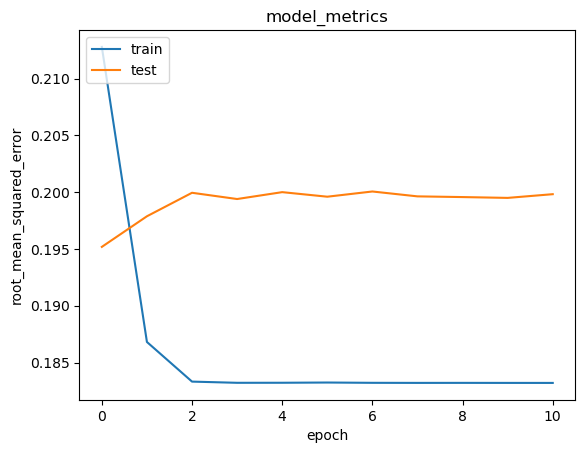

In [29]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Insight:**
- **class myCallback(tf.keras.callbacks.Callback):** digunakan untuk membuat calback sehingga menghentikan proses training jika mencapai konvergensi yang diinginkan.
- **early_stop = tf.keras.callbacks.EarlyStopping(...)** digunakan untuk menghentikan pelatihan jika performa validasi tidak membaik selama 10 epoch berturut-turut, mencegah overfitting.
- **reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(...)** akan mengurangi learning rate sebesar 50% jika val_loss tidak membaik selama 5 epoch, membantu model keluar dari plateau.
- **model.fit(...)** menjalankan proses pelatihan model dengan data training dan validasi, serta memanfaatkan tiga callback sekaligus untuk mengontrol pelatihan secara dinamis dan efisien.
</br>

Untuk membaca hasil training dapat dilakukan sebagai berikut:
- **loss:** Loss pada data training untuk menilai besar kesalahan model saat melatih data.
- **root_mean_squared_error:** RMSE pada data training untuk menilai rata-rata kesalahan model saat training.
- **val_loss:** Loss pada data validasi untuk menilai besar kesalahan model saat diuji ke data baru (tidak dilatih).
- **val_root_mean_squared_error:** RMSE pada data validasi untuk menilai rata-rata kesalahan pada data validasi.

## Solusi - Top 5 pada teknik Collaborative Filtering

In [37]:
import pandas as pd

# Ambil sample artis secara acak
artist_id = df_songs.Artist.sample(1).iloc[0]

# Lagu yang sudah pernah dibuat oleh artis itu
songs_by_artist = df_songs[df_songs.Artist == artist_id]

# Lagu yang belum dibuat oleh artis tsb (untuk rekomendasi)
songs_not_by_artist = df_songs[~df_songs['Name of the Song'].isin(songs_by_artist['Name of the Song'].values)]

# Ambil hanya kolom 'Name of the Song'
songs_not_by_artist_ids = songs_not_by_artist['Name of the Song'].values

# Buat array pasangan [artist_id, song_id] untuk semua lagu yang belum dibuat oleh artis itu
artist_song_array = np.hstack(
    ([[artist_id]] * len(songs_not_by_artist_ids), songs_not_by_artist_ids.reshape(-1, 1))
)

# Lakukan prediksi rating
ratings = model.predict(artist_song_array).flatten()

# Ambil 5 rekomendasi teratas
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_song_ids = songs_not_by_artist_ids[top_ratings_indices]

# Inverse transform untuk menampilkan nama asli
artist_name = le_artist.inverse_transform([artist_id - 1])[0]  # Karena sebelumnya +1 waktu encode
recommended_song_titles = le_song.inverse_transform(recommended_song_ids.astype(int))
recommended_scores = ratings[top_ratings_indices]

# Tampilkan hasil dalam tabel
print(f'\n Rekomendasi lagu untuk artist: {artist_name} (ID: {artist_id})')
print('=' * 50)

# Lagu-lagu yang pernah dibuat oleh artis ini (Top 5 Metascore)
top_artist_songs = songs_by_artist.sort_values(by='Metascore', ascending=False).head(5).copy()
top_artist_songs['Name of the Song'] = top_artist_songs['Name of the Song'].apply(lambda x: le_song.inverse_transform([x - 1])[0])
top_artist_songs['Artist'] = artist_name  # Ubah ke nama asli

# Tabel lagu milik artis
print("\n Lagu-lagu oleh artist ini:")
display(top_artist_songs[['Artist', 'Name of the Song', 'Metascore']])

# Tabel hasil rekomendasi
rekomendasi_df = pd.DataFrame({
    'Judul Lagu Rekomendasi': recommended_song_titles,
    'Prediksi Skor (0-1)': recommended_scores
})

print("\n Top 10 Lagu Rekomendasi:")
display(rekomendasi_df)


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

 Rekomendasi lagu untuk artist: Gogol Bordello (ID: 460)

 Lagu-lagu oleh artist ini:


,Artist,Name of the Song,Metascore
88334,Gogol Bordello,Super Taranta!,80.0
5055,Gogol Bordello,Trans-Continental Hustle,72.0



 Top 10 Lagu Rekomendasi:


,Judul Lagu Rekomendasi,Prediksi Skor (0-1)
0,Broken Boy Soldiers,0.514052
1,Ten New Songs,0.513777
2,Beak>,0.513702
3,Get Yr Blood Sucked Out,0.513679
4,Saint Cecilia EP,0.513520


**Insight:**
- **artist_id = df_songs.Artist.sample(1).iloc[0]** digunakan untuk mengambil artis secara acak dari dataset.
- **songs_by_artist = df_songs[df_songs.Artist == artist_id]** berisi semua lagu yang sudah pernah dibuat oleh artis tersebut.
- **songs_not_by_artist = df_songs[~df_songs['Name of the Song'].isin(songs_by_artist['Name of the Song'].values)]** berisi lagu-lagu yang belum dibuat oleh artis itu, dan akan menjadi kandidat untuk rekomendasi.
- **artist_song_array** array berisi pasangan [artist_id, song_id] yang dibentuk untuk setiap lagu yang belum dibuat oleh artis, sebagai input ke model.
- **model.predict(...)** untuk memprediksi seberapa besar kemungkinan artis membuat lagu-lagu tersebut.
- **ratings.argsort()[-5:][::-1]** mengambil 5 lagu teratas dengan skor prediksi tertinggi sebagai hasil rekomendasi.
- **le_artist.inverse_transform(...)** dan **le_song.inverse_transform(...)** digunakan untuk mengubah kembali ID artis dan lagu ke bentuk nama aslinya, karena sebelumnya sudah melalui proses encoding.
- **print(...)** menampilkan informasi artis, lagu-lagu yang pernah dibuatnya, dan 10 lagu rekomendasi berdasarkan hasil prediksi model.

## Evaluation Collaborative Filtering

In [33]:
y_pred = model.predict(x_val).flatten()

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE pada validation set: {rmse:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE pada validation set: 0.1952


**Insight:**
- Evaluasi digunakan dengan melakukan prediksi yang disimpan pada variabel y_pred dan prediksi dilkaukan dengan menilai RMSE.
- RMSE digunakan sebagai teknik untuk evaluasi dikarenakan ini cocok untuk kasus collaborative filtering dalam mengukur jarak hasil asli dengan hasil prediksi.
- Nilai RMSE (0.1952) dapat dikatakan baik dikarenakan RMSE < 0,2. Hal ini dengan mempertimbangkan dataset yang besar dan bervariasi sehingga Collaborative Filtering dianggap mampu untuk menebak score lagu.